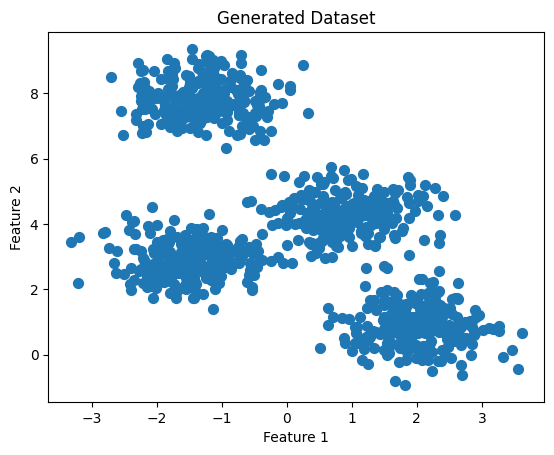

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

# Visualizing the generated data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


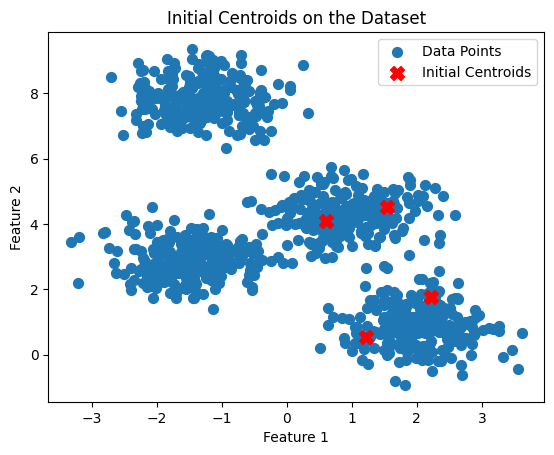

In [12]:
import numpy as np

k = 4  # Number of clusters
np.random.seed(0)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Visualizing centroids on the data
plt.scatter(X[:, 0], X[:, 1], s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Initial Centroids')
plt.title('Initial Centroids on the Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


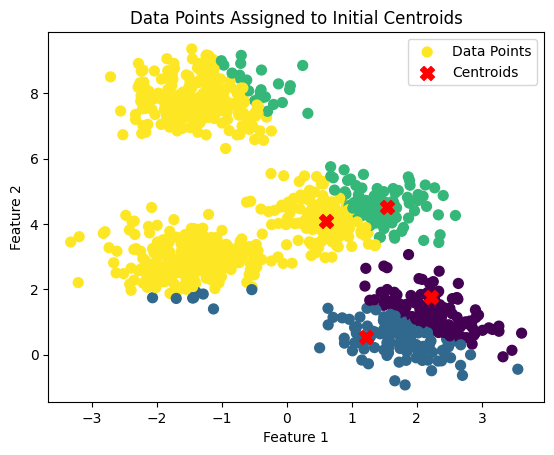

In [13]:
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

clusters = assign_clusters(X, centroids)

# Visualizing the cluster assignment
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title('Data Points Assigned to Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


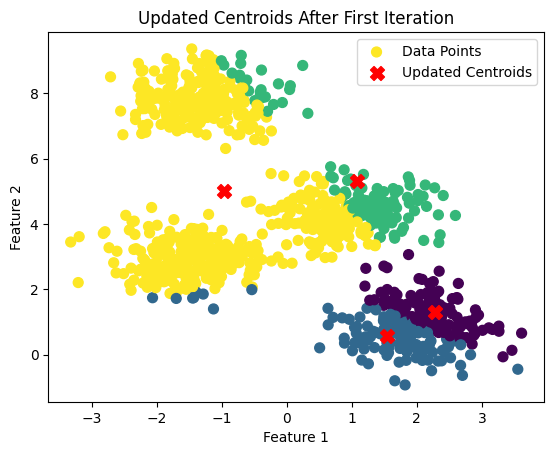

In [14]:
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

centroids = update_centroids(X, clusters, k)

# Visualizing updated centroids
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Updated Centroids')
plt.title('Updated Centroids After First Iteration')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


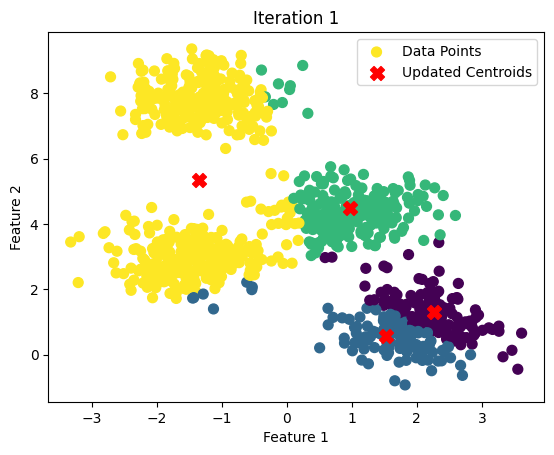

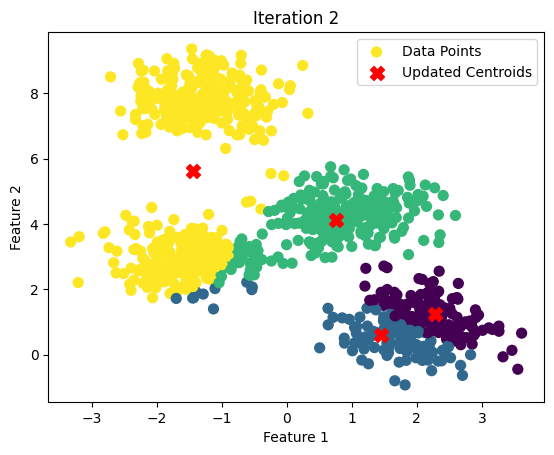

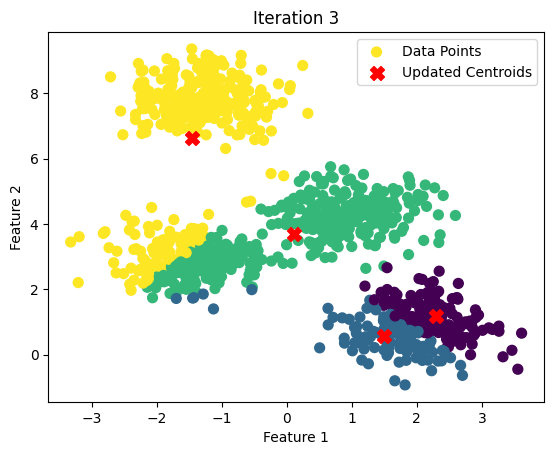

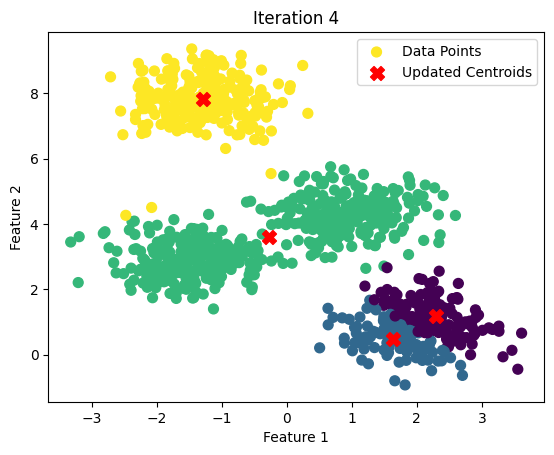

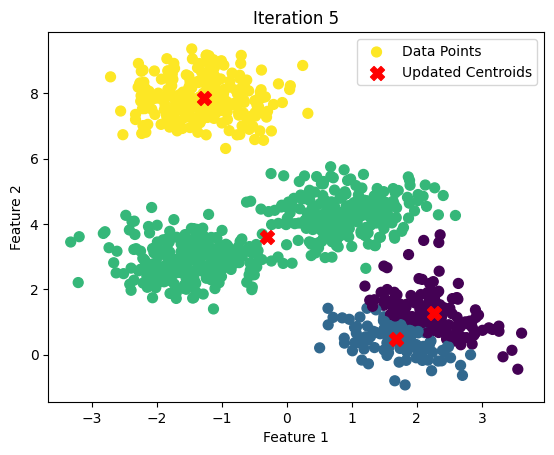

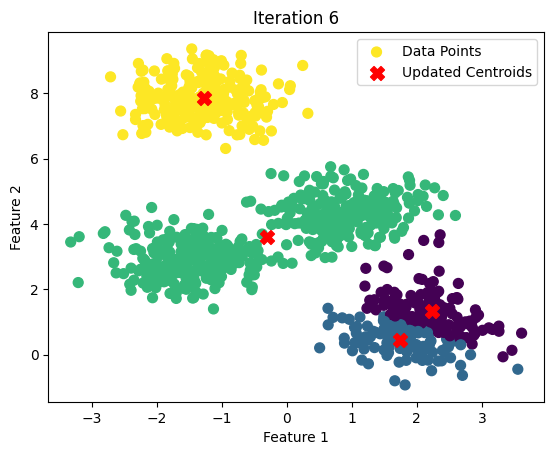

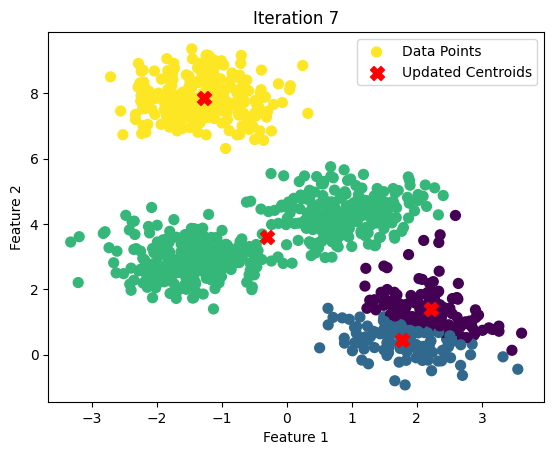

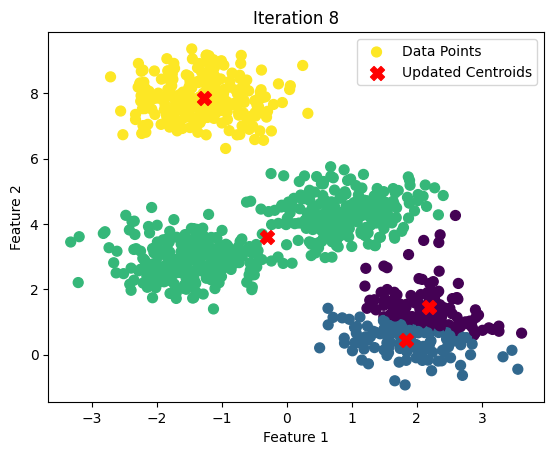

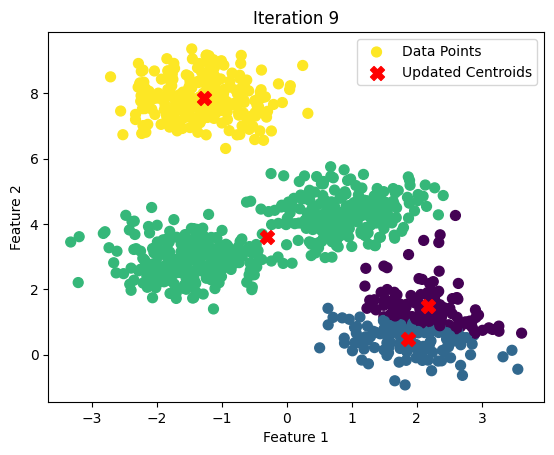

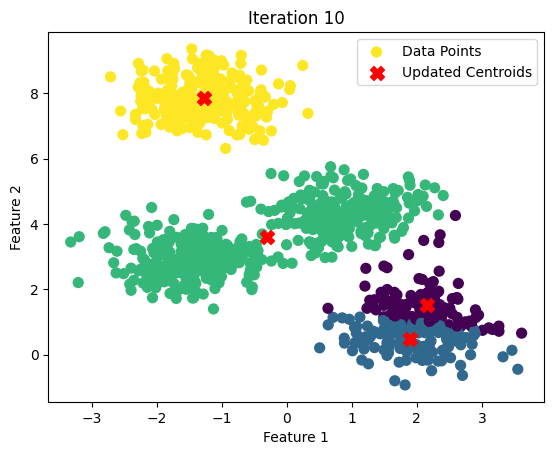

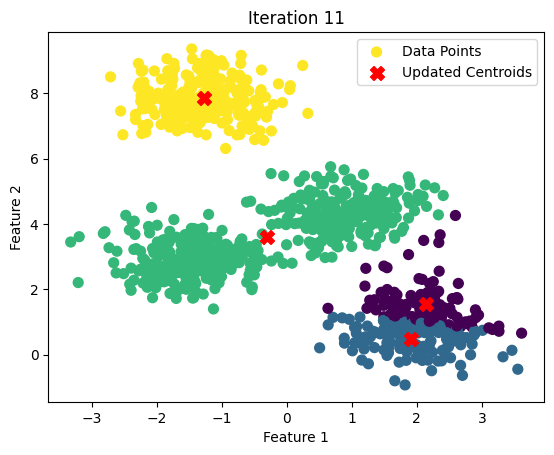

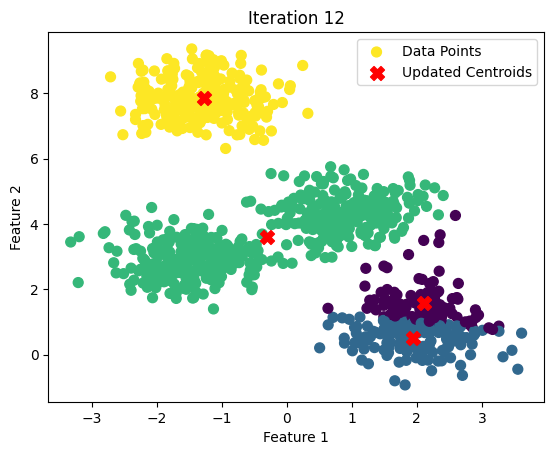

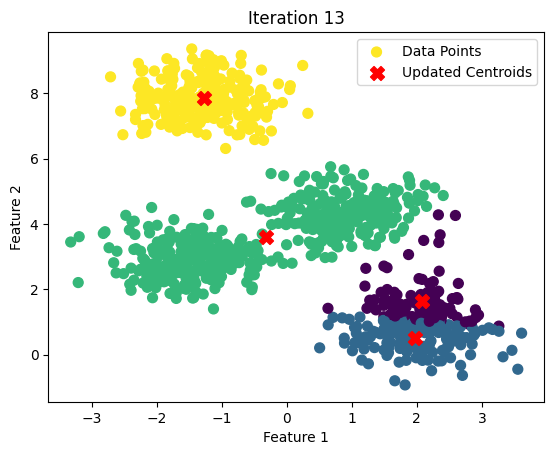

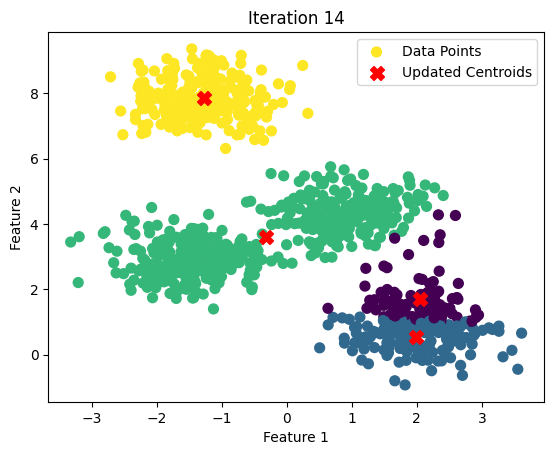

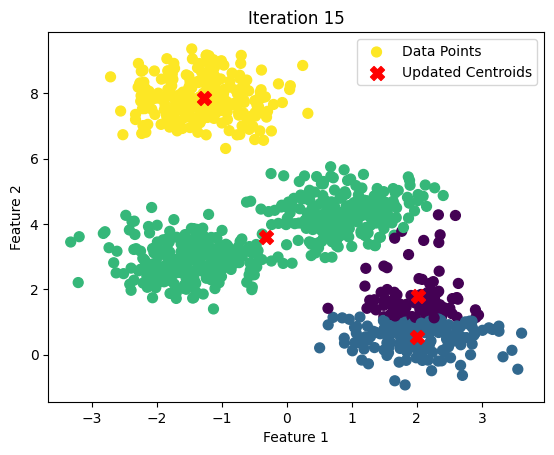

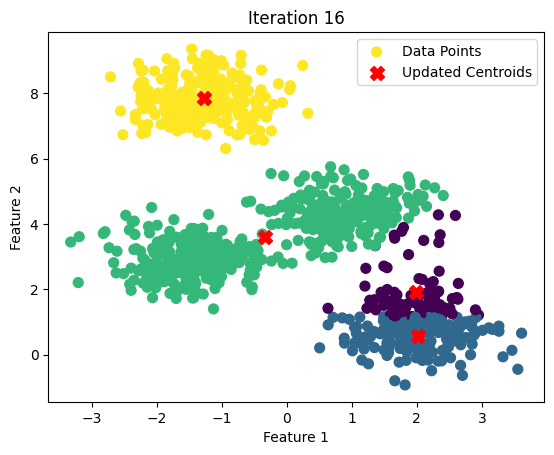

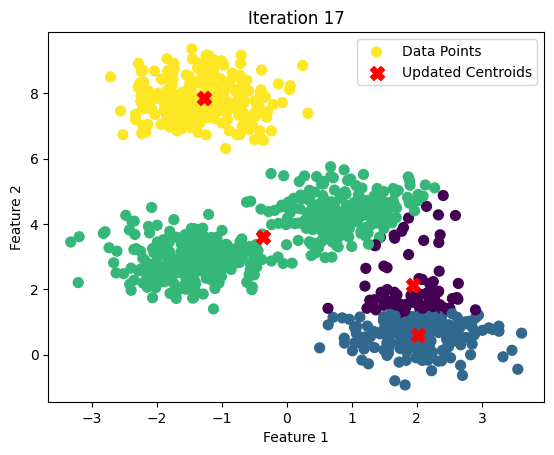

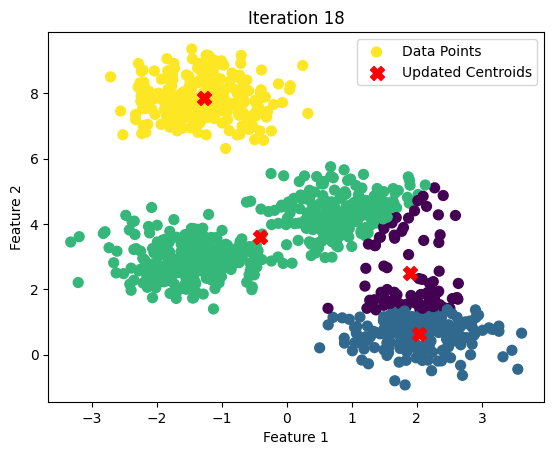

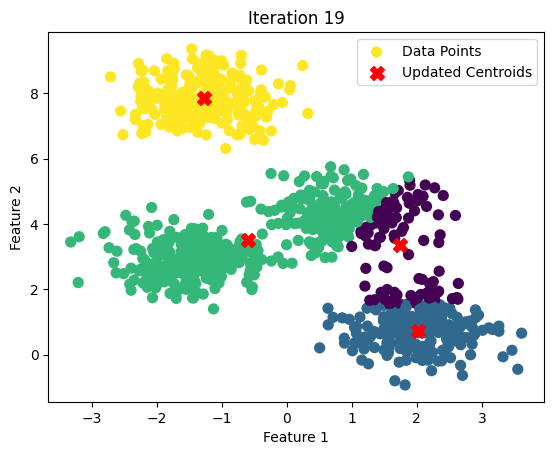

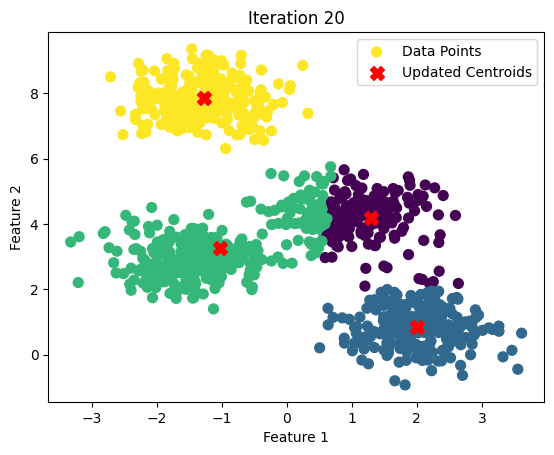

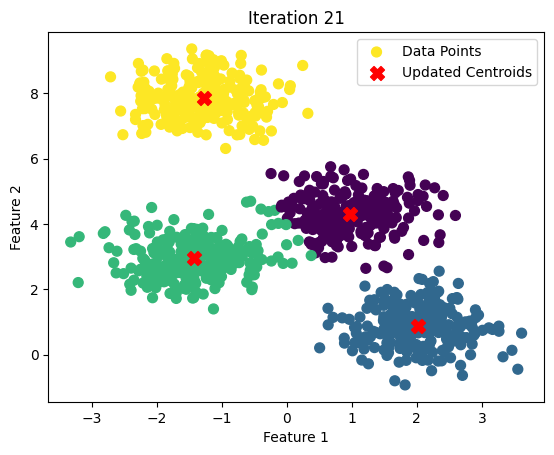

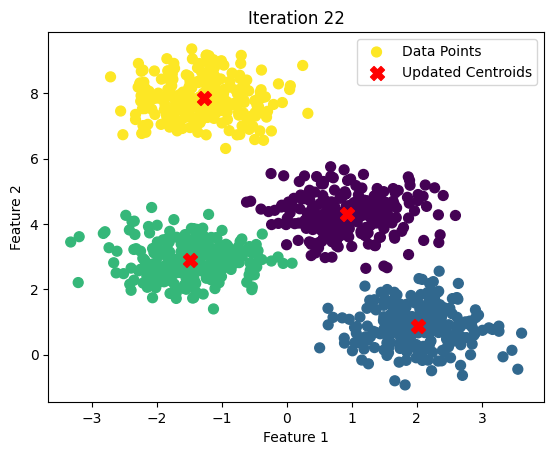

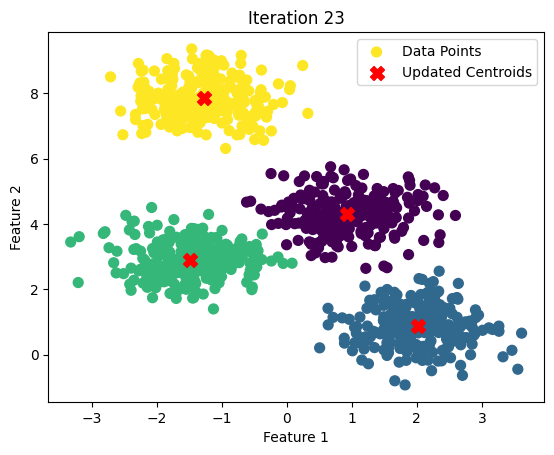

In [15]:
# This might be better as a separate function or loop outside of the notebook for clarity
iteration = 0
while True:
    iteration += 1
    old_centroids = centroids
    clusters = assign_clusters(X, centroids)
    centroids = update_centroids(X, clusters, k)

    # Visualizing the process
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Updated Centroids')
    plt.title(f'Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

    if np.all(centroids == old_centroids):
        break


In [16]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters)
print("Silhouette Score: ", score)


Silhouette Score:  0.6773333224010808
